In [1]:
from __future__ import print_function ## Force python3-like printing
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import time

import sqlite3
from sqlalchemy import create_engine

then = time.time()

opsimdbpath = os.environ.get('OPSIMDBPATH')
# opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/astro_lsst_01_1068_sqlite.db.gz"
print(opsimdbpath)

engine = create_engine('sqlite:///' + opsimdbpath)

conn = sqlite3.connect(opsimdbpath)

cursor = conn.cursor()
query = 'SELECT COUNT(*) FROM Summary'
cursor.execute(query)

cursor.fetchall()

now = time.time()
print("time taken = ", now - then)

/Users/berto/data/LSST/OpSimOutputDBs/minion_1016_sqlite.db
time taken =  7.9169838428497314


In [2]:
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night = 1000', engine)
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night < 731 AND night > 365', engine)
opsimdf = pd.read_sql_query('SELECT * FROM Summary', engine)

In [3]:
ddf = opsimdf.query('propID > 0') ## 56 is DDF
filters = np.unique(ddf["filter"])
print(filters)

['g' 'i' 'r' 'u' 'y' 'z']


In [4]:
ddf.head(20)

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec
0,1,1016,54,316,1.676483,-1.082473,y,2922,59580.033829,0,...,0.0,105.610378,0.920473,0.0,0.0,1.620307,0.000000,21.021236,1.643930,-1.108924
1,2,1016,54,372,1.694120,-1.033972,y,2961,59580.034275,0,...,0.0,105.167017,0.920473,0.0,0.0,0.049266,4.574944,21.026646,1.664257,-1.060423
2,3,1016,54,441,1.708513,-0.985271,y,2999,59580.034722,0,...,0.0,104.849578,0.920473,0.0,0.0,0.049298,4.595615,21.030520,1.680878,-1.011722
3,4,1016,54,505,1.720374,-0.936476,y,3038,59580.035169,0,...,0.0,104.669398,0.920473,0.0,0.0,0.049266,4.605366,21.032718,1.694604,-0.962927
4,5,1016,54,587,1.730248,-0.887672,y,3077,59580.035616,0,...,0.0,104.627207,0.920473,0.0,0.0,0.049177,4.604023,21.033233,1.706054,-0.914123
5,6,1016,54,680,1.738574,-0.838921,y,3115,59580.036062,0,...,0.0,104.725606,0.920473,0.0,0.0,0.049050,4.592226,21.032033,1.715721,-0.865372
6,7,1016,54,770,1.745690,-0.790249,y,3154,59580.036509,0,...,0.0,104.967791,0.920473,0.0,0.0,0.048916,4.571504,21.029077,1.723987,-0.816700
7,8,1016,54,857,1.751878,-0.741640,y,3192,59580.036955,0,...,0.0,105.357944,0.920473,0.0,0.0,0.048813,4.543796,21.024316,1.731166,-0.768091
8,9,1016,54,957,1.757386,-0.693017,y,3231,59580.037401,0,...,0.0,105.906574,0.920473,0.0,0.0,0.048800,4.511985,21.017621,1.737535,-0.719468
9,10,1016,54,1021,1.700932,-0.658150,y,3270,59580.037847,0,...,0.0,102.700018,0.920473,0.0,0.0,0.056177,4.607643,21.056753,1.681628,-0.684601


In [9]:
ddf["propID"].unique()

array([54, 53, 52, 56, 55])

In [54]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

ValueError: x and y must be the same size

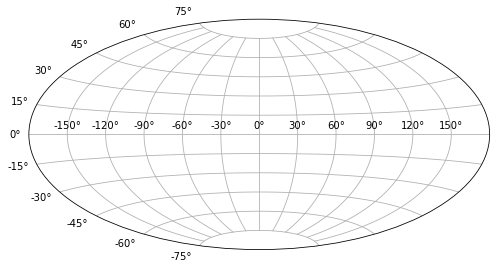

In [55]:
fig = plt.figure(figsize=[8, 4])

fig.subplots_adjust(left = 0.01, bottom = 0.05, top = 0.85, right = 0.99, hspace=0, wspace = 0)
ax = fig.add_subplot(111, projection="aitoff")
ax.grid(True)

ax.scatter(ddf["fieldRA"].unique(), ddf["fieldDec"].unique())